# F1 Score(F-measure)

* 정밀도와 재현율을 결합한 지표
* 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

$F1 = 2*((precision * recall) / (precision + reacall))$

훈련 데이터 점수 : 0.9928571428571429
평가 데이터 점수 : 0.9966666666666667
정확도 : 0.9966666666666667
[[147   1]
 [  0 152]]


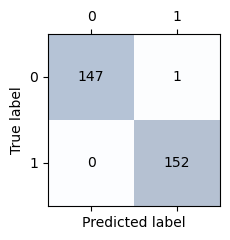

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# make_classification으로 data 생성 가능 
X, y= make_classification(
    n_samples=1000, n_features=2, n_informative=2,  # feature 2개 -> binary data형태
    n_redundant=0, n_clusters_per_class=1           # redundant=0 -> 노이즈 없게, clusters_per_class : class 당 cluster를 몇 개로 둘지
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

predict = model.predict(X_test) # test data에 대해서 얼만큼 예측을 했는지
print("정확도 : {}" .format(accuracy_score(y_test, predict)))

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) :
        ax.text(x=j, y=i, s=confmat[i, j], ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# (Predicted label, True label)   
#               (0, 0)           TN (True Negative  : 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0)
#               (0, 1)           FP (False Positive : 예측값을 Positive 값 1으로 예측했는데, 실제 값은 Negative 값 0) 
#               (1, 0)           FN (False Negative : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1)
#               (1, 1)           TP (True Positive  : 예측값을 Positive 값 1으로 예측했고, 실제 값도 Positive 값 1)


In [30]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)

print("F1 Score : {}" .format(f1))

F1 Score : 0.9967213114754099
